# **LOGISTIC REGRESSION 2**

### Importing Libraries

In [54]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [20]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
#To check missing values
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# #label encoding Gender
# label_encoder = preprocessing.LabelEncoder()
# df['Gender'] = label_encoder.fit_transform(df.Gender.values)
# df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [146]:
X = df.drop(["Outcome"], axis = 1)
X
y = df['Outcome']
y
print(X,y)
X1 = df.drop(["Outcome","SkinThickness","BloodPressure"], axis = 1)
X1

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


In [133]:
#Train_test_split data
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 0)
X1_train , X1_test, y_train , y_test = train_test_split(X1 , y , test_size = 0.25, random_state = 0)
# Displays the splitted data count
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)

Training dataset shape: (576, 5) (576,)
Testing dataset shape: (192, 5) (192,)


In [134]:
#creating the logistic regression model

logr = linear_model.LogisticRegression(solver = 'liblinear')
logr.fit(X_train, y_train)

print(logr.intercept_)
print(logr.coef_)

logr1 = linear_model.LogisticRegression(solver = 'lbfgs')
logr1.fit(X1_train, y_train)

[-4.80052506]
[[ 7.90744346e-02  2.78232446e-02 -4.82650770e-05  7.05541915e-01
   4.44016709e-03]]


LogisticRegression()

In [135]:
#predicting the values
y_pred = logr.predict(X_test)
y_pred
y1_pred = logr1.predict(X1_test)
y1_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

[[116  14]
 [ 28  34]]


<Axes: >

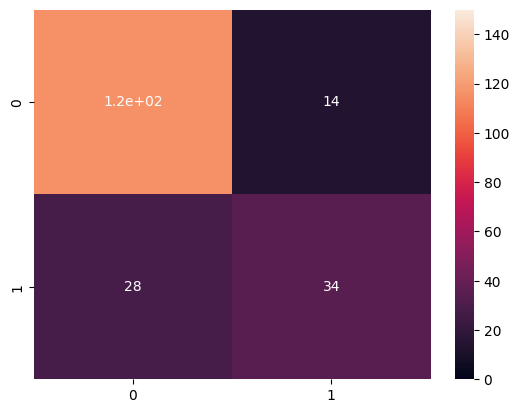

In [136]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix , annot = True , vmax = 150 , vmin = 0)

[[117  13]
 [ 27  35]]


<Axes: >

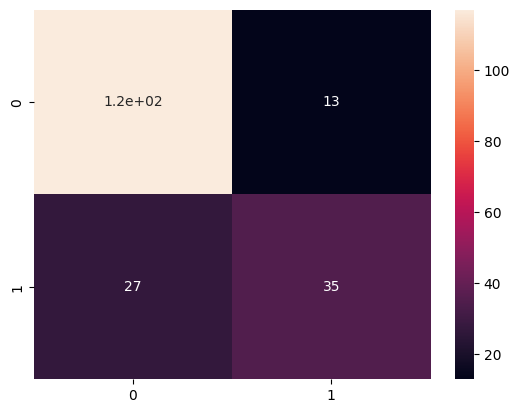

In [137]:
cf_matrix = confusion_matrix(y_test, y1_pred)
print(cf_matrix)
sns.heatmap(cf_matrix , annot = True) 

In [138]:
#checking the accuracy of the model
print("The accuracy of the model is : ",logr.score(X = X_test , y = y_test)*100,"%")
print("The accuracy of the model is : ",logr1.score(X = X1_test , y = y_test)*100,"%")

The accuracy of the model is :  78.125 %
The accuracy of the model is :  79.16666666666666 %


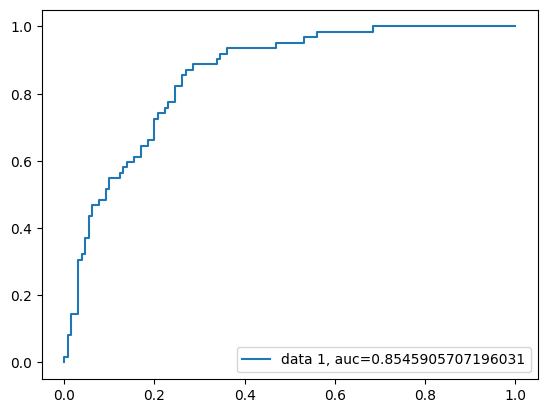

In [139]:
y_pred_proba = logr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
y_pred_proba = y_pred_proba.reshape(1, -1)

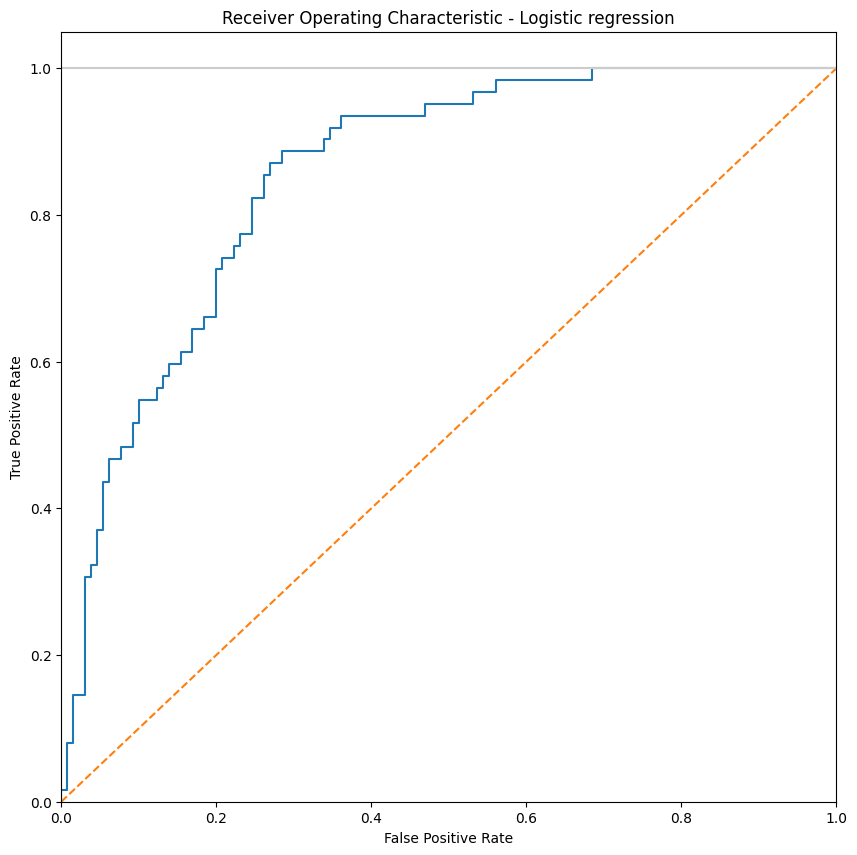

In [140]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr, tpr) # fr - false +ve rate . tpr = true +ve rate
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.show()

In [141]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


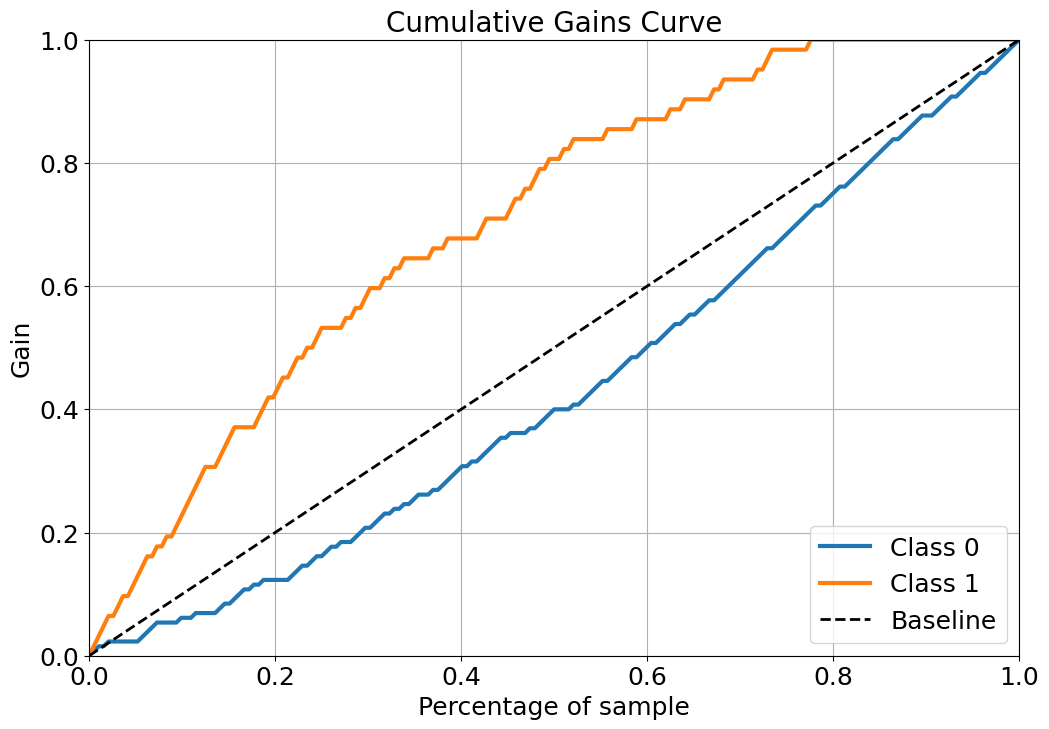

In [142]:
import scikitplot as skplt
# skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba)
# plt.show()

skplt.metrics.plot_cumulative_gain(y_test, X_test, figsize=(12, 8), title_fontsize=20, text_fontsize=18)
plt.show()

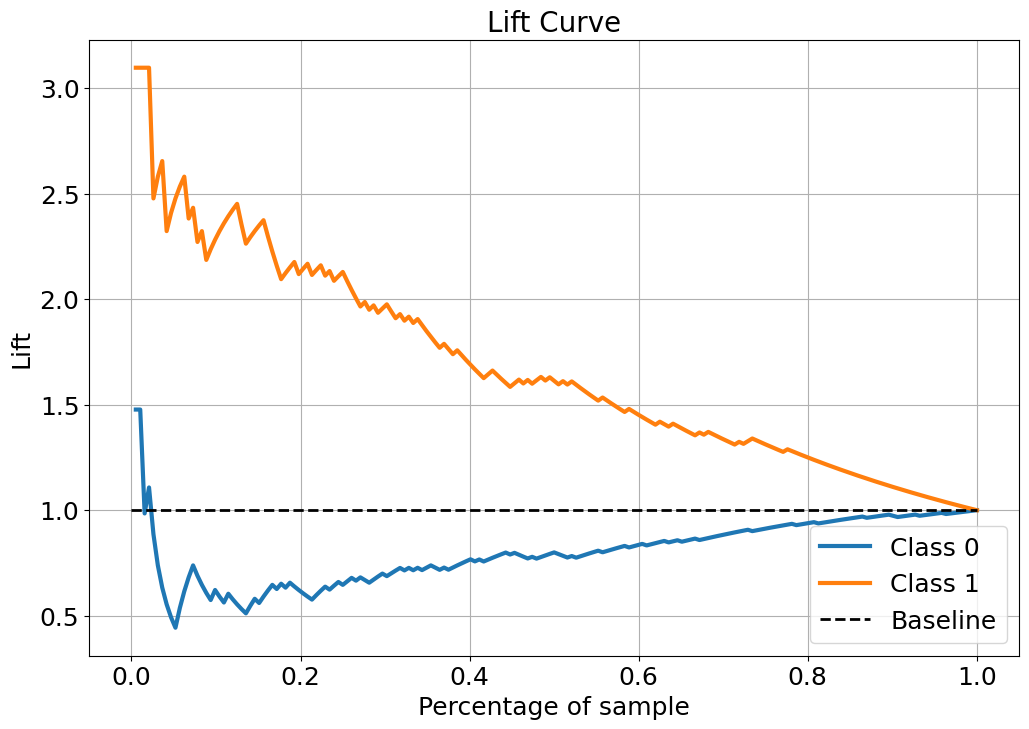

In [143]:
skplt.metrics.plot_lift_curve(
    y_test, X_test, figsize=(12, 8), title_fontsize=20, text_fontsize=18
)
plt.show()

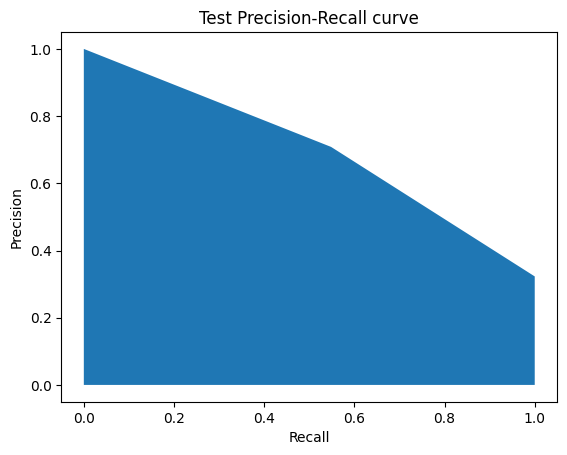

In [144]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Test Precision-Recall curve");

In [145]:

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       130
           1       0.71      0.55      0.62        62

    accuracy                           0.78       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192

